### Assignment 2

Data Wrangling II Create an “Academic performance” dataset of students and perform the following operations using Python. transformation should be one of the following reasons: to change the scale for better

- Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
- Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
    Apply data transformations on at least one of the variables. The purpose of this

understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
BASE_DIR = Path().resolve().parent
DATASET_PATH = BASE_DIR / 'DS' / 'datasets' / 'iris.csv'

In [3]:
data = {
    'Student_ID': [1, 2, 3, 4, 5],
    'Name': ['Katrina', 'Yogesh', 'Rajat', 'Atharv', 'Samantha'],
    'Age': [20, 21, np.nan, 22, 23],
    'Gender': ['F', 'M', 'M', 'M', 'F'],
    'OS_Score': [85, 90, 78, np.nan, 92],  
    'OOP_Score': [88, np.nan, 80, 85, 90],  
    'CN_Score': [82, 85, 88, 90, 95],  
    'ANN_Score': [75, 80, 85, np.nan, 88]  
}

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,Student_ID,Name,Age,Gender,OS_Score,OOP_Score,CN_Score,ANN_Score
0,1,Katrina,20.0,F,85.0,88.0,82,75.0
1,2,Yogesh,21.0,M,90.0,NaN,85,80.0
2,3,Rajat,NaN,M,78.0,80.0,88,85.0
3,4,Atharv,22.0,M,NaN,85.0,90,NaN
4,5,Samantha,23.0,F,92.0,90.0,95,88.0


In [6]:
df.isnull().sum()

Student_ID    0
Name          0
Age           1
Gender        0
OS_Score      1
OOP_Score     1
CN_Score      0
ANN_Score     1
dtype: int64

In [7]:
# df.dropna()

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['OS_Score'] = df['OS_Score'].fillna(df['OS_Score'].mean())
df['OOP_Score'] = df['OOP_Score'].fillna(df['OOP_Score'].mean())
df['ANN_Score'] = df['ANN_Score'].fillna(df['ANN_Score'].mean())

In [9]:
df.isnull().sum()

Student_ID    0
Name          0
Age           0
Gender        0
OS_Score      0
OOP_Score     0
CN_Score      0
ANN_Score     0
dtype: int64

In [10]:
# df.boxplot()

<Axes: >

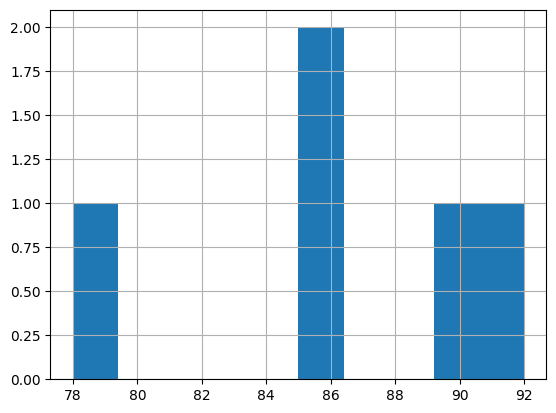

In [11]:
df["OS_Score"].hist()

In [12]:
newdf = df[df["OS_Score"] > 30]
newdf

,Student_ID,Name,Age,Gender,OS_Score,OOP_Score,CN_Score,ANN_Score
0,1,Katrina,20.0,F,85.00,88.00,82,75.0
1,2,Yogesh,21.0,M,90.00,85.75,85,80.0
2,3,Rajat,21.5,M,78.00,80.00,88,85.0
3,4,Atharv,22.0,M,86.25,85.00,90,82.0
4,5,Samantha,23.0,F,92.00,90.00,95,88.0


In [13]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

In [14]:
print("Outliers in OS_Score:", detect_outliers(df['OS_Score']))
print("Outliers in OOP_Score:", detect_outliers(df['OOP_Score']))
print("Outliers in CN_Score:", detect_outliers(df['CN_Score']))
print("Outliers in ANN_Score:", detect_outliers(df['ANN_Score']))

Outliers in OS_Score: Series([], Name: OS_Score, dtype: float64)
Outliers in OOP_Score: 2    80.0
Name: OOP_Score, dtype: float64
Outliers in CN_Score: Series([], Name: CN_Score, dtype: int64)
Outliers in ANN_Score: Series([], Name: ANN_Score, dtype: float64)


In [15]:
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower_bound, upper_bound)

In [16]:

df['OS_Score'] = cap_outliers(df['OS_Score'])
df['OOP_Score'] = cap_outliers(df['OOP_Score'])
df['CN_Score'] = cap_outliers(df['CN_Score'])
df['ANN_Score'] = cap_outliers(df['ANN_Score'])

In [17]:
df['OS_Score_Log'] = np.log(df['OS_Score'] + 1)  
df[['OS_Score', 'OS_Score_Log']]

,OS_Score,OS_Score_Log
0,85.00,4.454347
1,90.00,4.510860
2,78.00,4.369448
3,86.25,4.468778
4,92.00,4.532599


In [18]:
df['CN_Score_Normalized'] = (df['CN_Score'] - df['CN_Score'].min()) / (df['CN_Score'].max() - df['CN_Score'].min())
df[['CN_Score', 'CN_Score_Normalized']]

,CN_Score,CN_Score_Normalized
0,82,0.000000
1,85,0.230769
2,88,0.461538
3,90,0.615385
4,95,1.000000


In [19]:
df

,Student_ID,Name,Age,Gender,OS_Score,OOP_Score,CN_Score,ANN_Score,OS_Score_Log,CN_Score_Normalized
0,1,Katrina,20.0,F,85.00,88.00,82,75.0,4.454347,0.000000
1,2,Yogesh,21.0,M,90.00,85.75,85,80.0,4.510860,0.230769
2,3,Rajat,21.5,M,78.00,80.50,88,85.0,4.369448,0.461538
3,4,Atharv,22.0,M,86.25,85.00,90,82.0,4.468778,0.615385
4,5,Samantha,23.0,F,92.00,90.00,95,88.0,4.532599,1.000000
